In [1]:
def make_basic_block_list(path):
  basic_blocks = []

  with open(path, 'r') as file:
      lines = file.readlines()
      block = []
      for line in lines:
          line = line[:-1] # 개행문자 삭제
          block.append(line[:3])
          if line.startswith('j') or line.startswith('r'):
              basic_blocks.append(block)
              block = []

  return basic_blocks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

rootPath = '/content/drive/MyDrive/Malware Analysis/'

benignAsmPath = rootPath + 'kisa_dataset/benign/'
malignAsmPath = rootPath + 'kisa_dataset/malign/'

benignBasicBlockDirPath = rootPath + 'kisa_dataset/benign_block/'
malignBasicBlockDirPath = rootPath + 'kisa_dataset/malign_block/'

In [ ]:
import matplotlib.pyplot as plt

test = []

def make_benign_block():
  benign_asm_list = os.listdir(benignAsmPath)
  
  for benign_asm in benign_asm_list:
      abs_path = benignAsmPath + benign_asm
      basic_block_list = make_basic_block_list(abs_path)
      
      if len(basic_block_list) < 100:
        continue

      test.append(len(basic_block_list))
      outfile_name = benignBasicBlockDirPath + benign_asm[:-4] + '.txt'
      print(outfile_name)
      outfile = open(outfile_name, 'w')
      for block in basic_block_list:
        if len(block) > 10:
          outfile.write(','.join(block) + '\n')
      outfile.close()

make_benign_block()

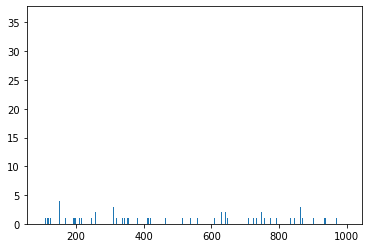

In [ ]:
plt.hist(test, bins=range(100, 1000,1))
plt.show()

In [ ]:
import statistics
print(statistics.median(test)) # 베이직 블록 개수
print(statistics.stdev(test))

5588.5
9361.553365098296


In [ ]:
import pandas as pd
a = pd.Series(test)
print(a.describe())

q1 = a.quantile(0.25)
q3 = a.quantile(0.75)
iqr = q3 - q1

condition= (test > q3 + 1.5*iqr)

idx = a[condition].index
a.drop(idx, inplace=True) 

print(a.describe())

count     1616.000000
mean      9755.777847
std       9361.553365
min        107.000000
25%       2134.000000
50%       5588.500000
75%      17766.250000
max      41890.000000
dtype: float64
count     1615.000000
mean      9735.880495
std       9330.209122
min        107.000000
25%       2134.000000
50%       5577.000000
75%      17725.500000
max      41176.000000
dtype: float64


In [ ]:
def make_malign_block():
    malign_asm_list = os.listdir(malignAsmPath)
    for malign_asm in malign_asm_list:
        abs_path = malignAsmPath + malign_asm
        basic_block_list = make_basic_block_list(abs_path)

        if len(basic_block_list) < 100:
          continue

        outfile_name = malignBasicBlockDirPath + malign_asm[:-4] + '.txt'
        print(outfile_name)
        outfile = open(outfile_name, 'w')
        for block in basic_block_list:
          if len(block) > 10:
            outfile.write(','.join(block) + '\n')
        outfile.close()

make_malign_block()